In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import ngrams
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
data = pd.read_csv(r'IMDB Dataset.csv', sep=',', encoding='utf-8')
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.shape 

(50000, 2)

In [4]:
# DISPLAY SOME REVIEWS
for i in range(1,4):
    print(f'Reviews   : {data.loc[i, "review"]}')
    print(f'Sentiment : {data.loc[i, "sentiment"]}\n')

Reviews   : A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly 

In [5]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [6]:
data.duplicated(subset='review').sum()

np.int64(418)

In [7]:
# DROP ALL DUPLICATE DATA
data.drop_duplicates(subset='review', inplace=True)

# AFTER DROPPED
data.shape

(49582, 2)

In [8]:
# REMOVE HTML TAG

clean_data = []

# ITERATE OVER EACH REVIEW SAMPLE
for review in data['review']:

    soup = BeautifulSoup(review, 'html.parser')  # DEFINE BEAUTIFUL SOUP
    text = soup.get_text()     # GET ONLY TEXT FROM BEAUTIFULSOUP
    clean_data.append(text)

# DISPLAY INFORMATION
print(f'Before BeautifulSoup : {data.loc[1, "review"]}\n')
print(f'After BeautifulSoup  : {clean_data[1]}')

Before BeautifulSoup : A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) ar

In [9]:
# CONVERT TO LOWERCASE
reviews = [review.lower() for review in clean_data]

# DEFINE STOPWORDS
stop_words = stopwords.words('english')
clean_data = []

# ITERATE OVER LIST OF STRINGS TO REMOVE A STOPWORDS
for review in reviews:

    # GET ALL WORD THAT ARE NOT A STOPWORDS
    clean_text = [word for word in review.split() if word not in stop_words]
    clean_text = ' '.join(clean_text)   # COMBINES EVERY WORD INTO SENTENCES

    clean_data.append(clean_text)   # PUSH EVERY REVIEW INTO LIST

# DISPLAY 
print(f'Before Removing Stopwords : {reviews[0]}\n')
print(f'After Removing Stopwords  : {clean_data[0]}')

Before Removing Stopwords : one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that i

In [ ]:
import os
from zipfile import ZipFile

# DOWNLOAD LEMMATIZER FILE
nltk.download('wordnet', download_dir='/root/nltk_data')

# CREATE NEW DIRECTORY
os.makedirs('/root/nltk_data/corpora', exist_ok=True)

# ADD PATH NLTK
nltk.data.path.append('/root/nltk_data')

# EXTRACT-IT
with ZipFile('/root/nltk_data/corpora/wordnet.zip', 'r') as zip_ref:
    zip_ref.extractall('/root/nltk_data/corpora')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# LEMMATIZATION

lemma = WordNetLemmatizer()

lemmatized_data = []

# ITERATE OVER LIST OF STRINGS TO LEMMATIZE 
for review in clean_data:

    # LEMMATIZE ADJECTIVES TOKEN/WORD
    clean_text_1 = [lemma.lemmatize(word= word, pos='a') for word in review.split()]  
    clean_text_1 = ' '.join(clean_text_1)  # COMBINES EVERY WORD INTO SENTENCES

    # LEMMATIZE VERB TOKEN/WORD
    clean_text_2 = [lemma.lemmatize(word = word, pos='v') for word in clean_text_1.split()] 
    clean_text_2 = ' '.join(clean_text_2) # COMBINES EVERY WORD INTO SENTENCES

    # LEMMATIZE NOUN TOKEN/WORD
    clean_text_3 = [lemma.lemmatize(word= word, pos='n') for word in clean_text_2.split()] 
    clean_text_3 = ' '.join(clean_text_3)

    lemmatized_data.append(clean_text_3) 

# DISPLAY
for i in range(5):
    print(f'Before Lemmatize : {clean_data[i]}\n')
    print(f'After Lemmatize  : {lemmatized_data[i]}')

Before Lemmatize : one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold nickel, inmates w

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\hajja/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


: 

In [ ]:
import nltk
print(nltk.data.path)

['C:\\Users\\hajja/nltk_data', 'c:\\Program Files\\Python313\\nltk_data', 'c:\\Program Files\\Python313\\share\\nltk_data', 'c:\\Program Files\\Python313\\lib\\nltk_data', 'C:\\Users\\hajja\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [11]:
# TOKENIZATION

new_data = []

# ITERATE OVER LIST OF STRINGS TO TOKENIZE EVERY REVIEW
for review in lemmatized_data:

    # TOKENIZE EVERY REVIEW
    text = word_tokenize(text= review, language='english', preserve_line= False)
    new_data.append(text)

# DISPLAY
print(f'Before Tokenization : {lemmatized_data[0]}\n')
print(f'After Tokenization  : {new_data[0]}')

Before Tokenization : one reviewer mention watch 1 oz episode hooked. right, exactly happen me.the first thing strike oz brutality unflinching scene violence, set right word go. trust me, show faint hearted timid. show pull punch regard drugs, sex violence. hardcore, classic use word.it call oz nickname give oswald maximum security state penitentary. focus mainly emerald city, experimental section prison cell glass front face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealing shady agreement never far away.i would say main appeal show due fact go show dare. forget pretty picture paint mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw strike nasty surreal, say ready it, watch more, develop taste oz, get accustom high level graphic violence. violence, injustice (crooked guard who'll sell nickel, inmate who'll kill order get away it, well

In [12]:
# REMOVE PUNCTUATION

import re

final_data = []

# REMOVE ALL PUNCTUATION USING REGEX
for review in new_data:             # ITERATE OVER LIST OF STRINGS

    cleaned_token = []

    # ITERATE OVER EVERY TOKEN
    for token in review:
        clean_token = re.sub(pattern= r'[^\w\s]', repl= '', string= token)  # REPLACE ALL PUNCTUATION INTO EMPTY STRING ''

        # PUSH NON EMPTY STRINGS AND REMOVE CHARACTERS THAT HAVE ONLY 1
        if len(clean_token) > 1 :
            cleaned_token.append(clean_token)

    final_data.append(cleaned_token)  # PUSH CLEANED REVIEWS

# DISPLAY
for i in range(3):
    print(f'Before Remove Punctuation : {new_data[i]}\n')
    print(f'After Remove Punctuation  : {final_data[i]}\n')

Before Remove Punctuation : ['one', 'reviewer', 'mention', 'watch', '1', 'oz', 'episode', 'hooked', '.', 'right', ',', 'exactly', 'happen', 'me.the', 'first', 'thing', 'strike', 'oz', 'brutality', 'unflinching', 'scene', 'violence', ',', 'set', 'right', 'word', 'go', '.', 'trust', 'me', ',', 'show', 'faint', 'hearted', 'timid', '.', 'show', 'pull', 'punch', 'regard', 'drugs', ',', 'sex', 'violence', '.', 'hardcore', ',', 'classic', 'use', 'word.it', 'call', 'oz', 'nickname', 'give', 'oswald', 'maximum', 'security', 'state', 'penitentary', '.', 'focus', 'mainly', 'emerald', 'city', ',', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', ',', 'privacy', 'high', 'agenda', '.', 'em', 'city', 'home', 'many', '..', 'aryans', ',', 'muslims', ',', 'gangstas', ',', 'latinos', ',', 'christians', ',', 'italians', ',', 'irish', 'more', '....', 'so', 'scuffles', ',', 'death', 'stares', ',', 'dodgy', 'dealing', 'shady', 'agreement', 'never', 'far', 'away.i', 'would', '

In [13]:
print(f'There are {len(final_data)} samples')
print(f'Type : {type(final_data)}')

There are 49582 samples
Type : <class 'list'>


In [14]:
# COUNT TOTAL OF UNIQUE WORDS

unique_words = set()

# ITERATE OVER LIST OF STRING
for review in final_data:

    # ITERATE EVERY WORD IN A SENTENCE
    for word in review:
        unique_words.add(word)

print(f'number of unique words: {len(unique_words)}')

number of unique words: 178749


In [15]:
# SENTIMENT FREQUENCY

data['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

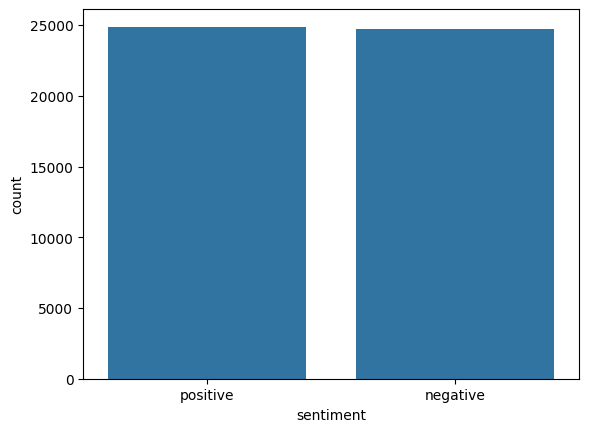

In [16]:
# PLOT IT

sns.countplot(data, x= 'sentiment')

Text(0.5, 1.0, 'Text Length Distribution')

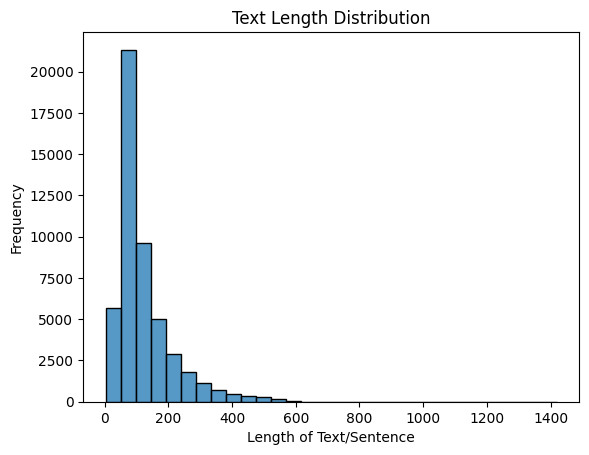

In [17]:
# TEXT/SENTENCE LENGTH DISTRIBUTION

# COUNT SENTENCE/TEXT LENGTH IN DATASET/DOCUMENT
length_text = [len(text) for text in final_data]

# DISPLAY VISUALIZE
sns.histplot(data= length_text, bins=30)
plt.xlabel('Length of Text/Sentence')
plt.ylabel('Frequency')

plt.title('Text Length Distribution')

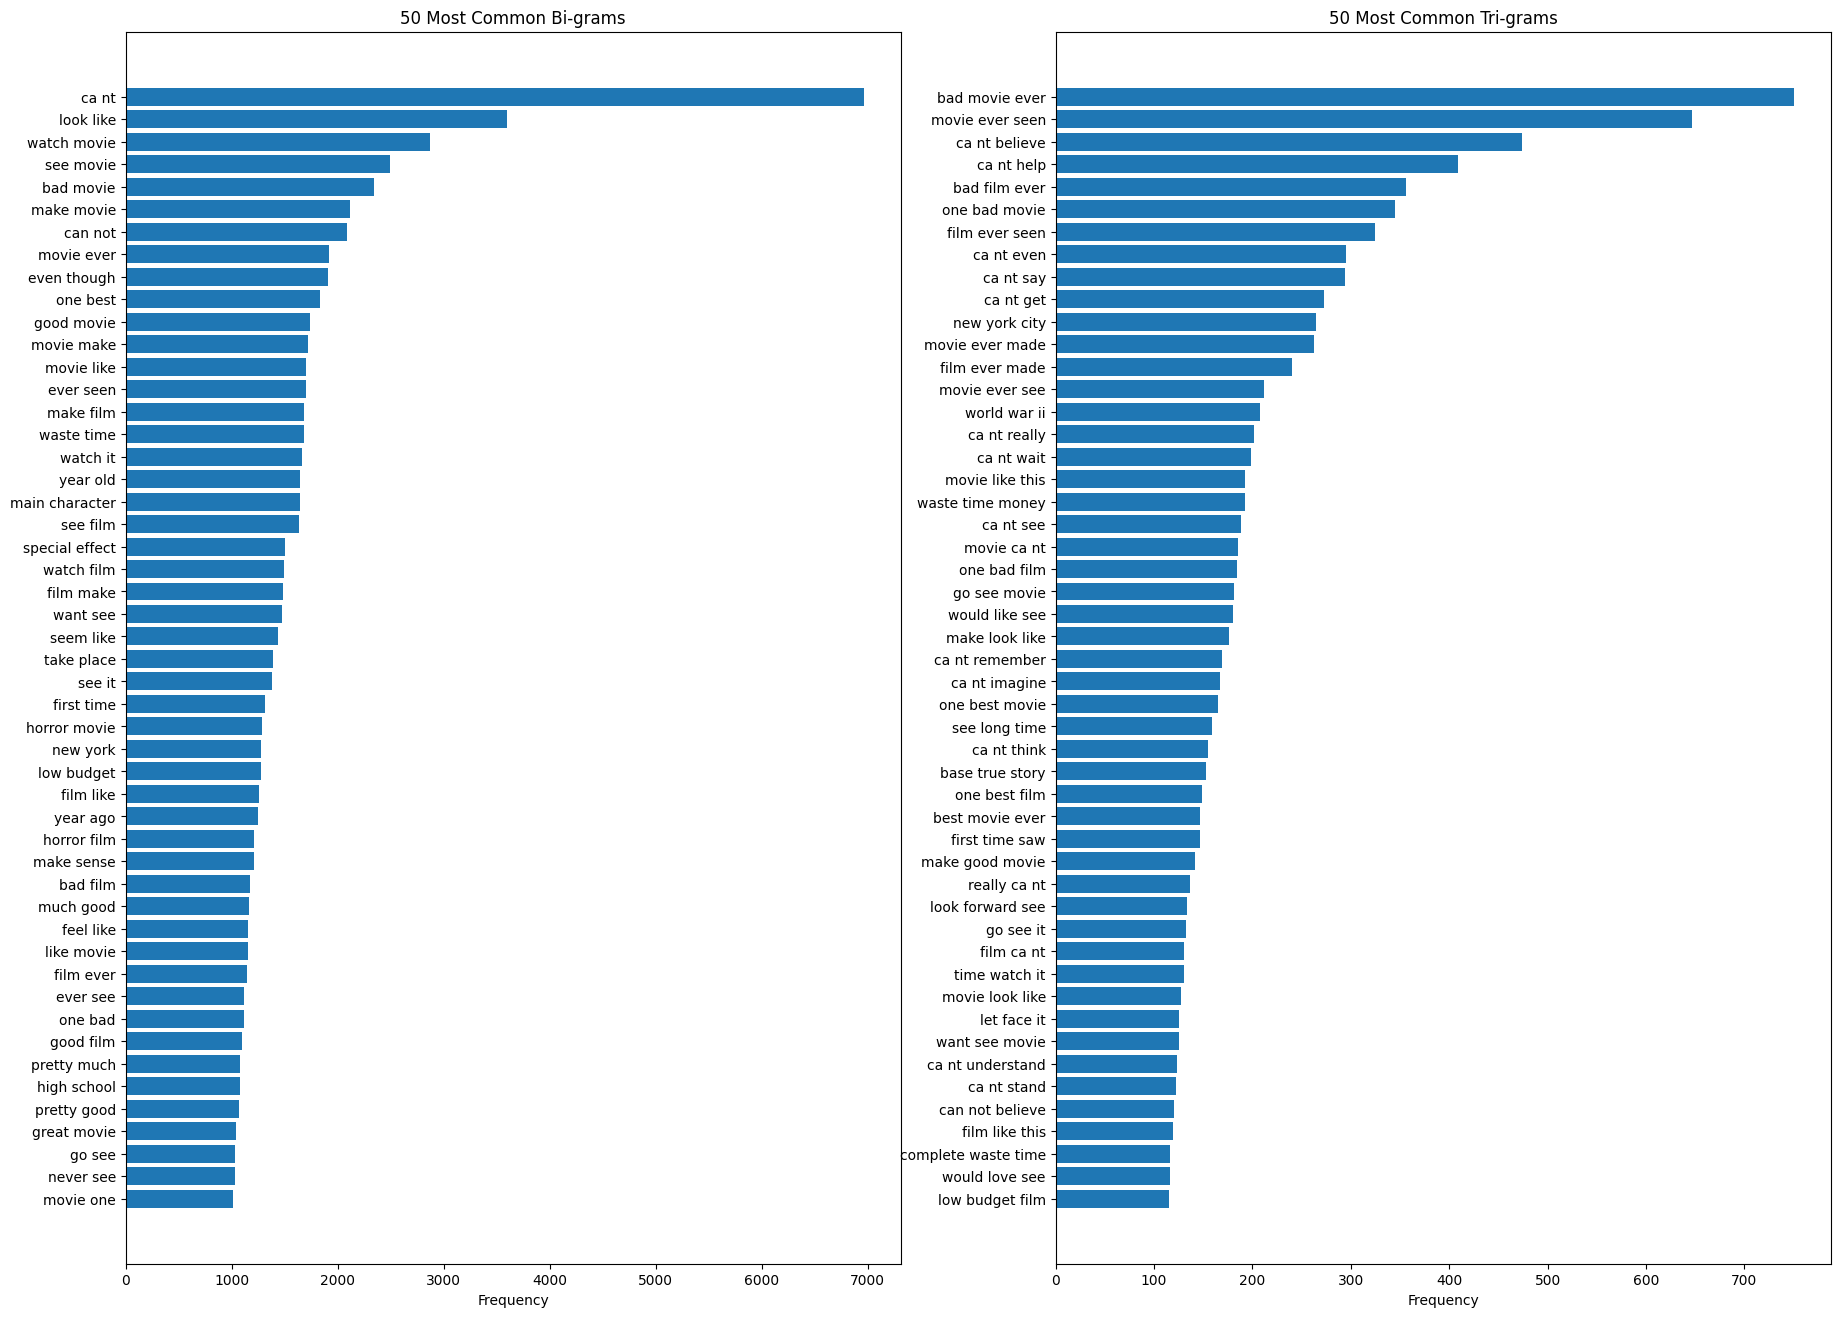

In [18]:

bigrams = []
trigrams = []


for review in final_data:

    # CREATE BI-GRAMS TUPLE
    bigrams.extend( ngrams(sequence= review, n= 2) )

    # CREATE TRI-GRAMS TUPLE
    trigrams.extend( ngrams(sequence= review, n= 3) )

# PUSH IT TO DICTIONARY
bigrams_freq  = collections.Counter(bigrams)
trigrams_freq = collections.Counter(trigrams)


# GET TOP 50
top_50_bigrams  = bigrams_freq.most_common(50)
top_50_trigrams = trigrams_freq.most_common(50)

# VISUALIZE BI-GRAMS
words, freqs  = zip(*top_50_bigrams)
words = [' '.join(bigram) for bigram in words]    # CONVERT BI-GRAMS TO LIST


  # BAR PLOT
plt.figure(figsize=(22,16))
plt.subplot(1,2,1)
plt.barh(words, freqs)

plt.xlabel('Frequency')
plt.title('50 Most Common Bi-grams')
plt.gca().invert_yaxis()      # SORT TO DESCENDING


# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# VISUALIZE TRI-GRAMS
words, freqs  = zip(*top_50_trigrams)
words = [' '.join(trigram) for trigram in words]  # CONVERT TRI-GRAMS TO LIST

plt.subplot(1,2,2)
plt.barh(words, freqs)

plt.xlabel('Frequency')
plt.title('50 Most Common Tri-grams')
plt.gca().invert_yaxis()      # SORT TO DESCENDING

plt.show()

Text(0, 0.5, 'Words')

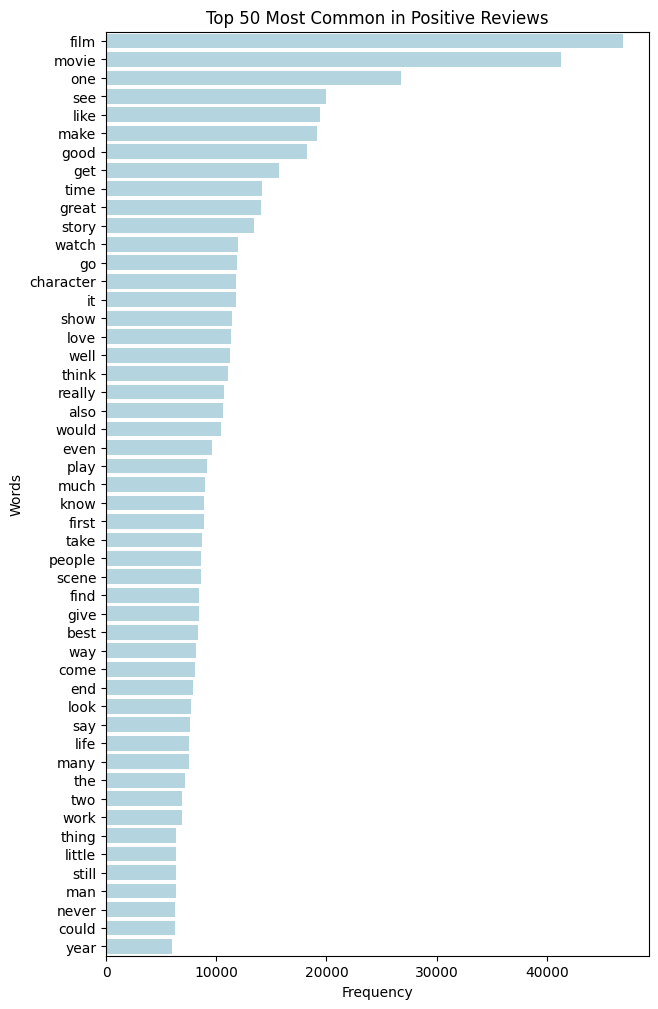

In [21]:
# MOST APPEAR WORDS IN POSITIVE REVIEWS

positive_reviews = []

# SELECT ONLY POSITIVE REVIEWS
for i in range(len(final_data)):

    if data.loc[i, 'sentiment'] == 'positive':
        positive_reviews.append(final_data[i])


positive_dict = {}   # DEFINE DICTIONARY

# CREATE HASH TABLE FOR POSITIVE REVIEWS
for review in positive_reviews:

    # ITERATE OVER TOKEN 
    for token in review:

        if token not in positive_dict:  # IF TOKEN IS NOT IN THE DICTIONARY
            positive_dict[token] = 1
        else:
            positive_dict[token] += 1  # IF TOKEN IS IN THE DICTIONARY


# GET TOP 50 POSITIVE WORDS
top_50_positive = dict( sorted(positive_dict.items(), key= lambda x: x[1], reverse= True)[:50] )

# CONVERT DICT TO LIST 
keys = list(top_50_positive.keys())
values = list(top_50_positive.values())

plt.figure(figsize=(7,12))

sns.barplot(x= values, y= keys, color='lightblue')
plt.title('Top 50 Most Common in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')


Text(0, 0.5, 'Words')

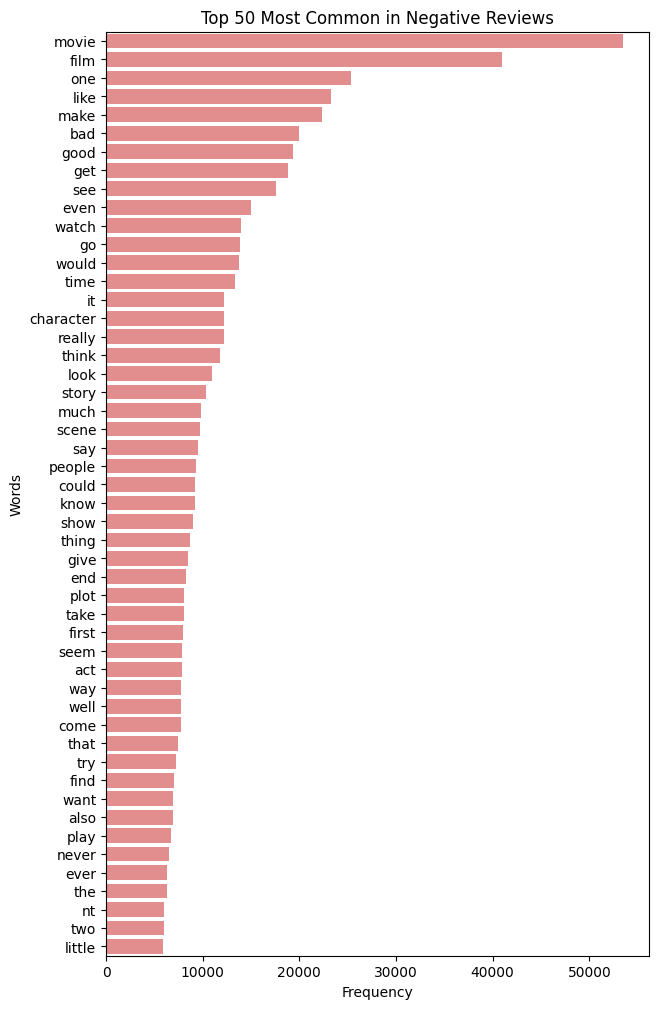

In [22]:
# MOST APPEAR WORDS IN NEGATIVE REVIEWS

negative_reviews = []

# SELECT ONLY NEGATIVE REVIEWS
for i in range(len(final_data)):
    if data.loc[i, 'sentiment'] == 'negative':  
        negative_reviews.append(final_data[i])


negative_dict = {}   # DEFINE DICTIONARY

# CREATE HASH TABLE FOR POSITIVE REVIEWS
for review in negative_reviews:

    # ITERATE OVER TOKEN 
    for token in review:

        if token not in negative_dict:  # IF TOKEN IS NOT IN THE DICTIONARY
            negative_dict[token] = 1
        else:
            negative_dict[token] += 1   # IF TOKEN IS IN THE DICTIONARY


# GET TOP 50 NEGATIVE WORDS
top_50_negative = dict( sorted(negative_dict.items(), key= lambda x: x[1], reverse= True)[:50] )

keys = list(top_50_negative.keys())
values = list(top_50_negative.values()) 

plt.figure(figsize=(7,12))

sns.barplot(x= values, y= keys, color='lightcoral')
plt.title('Top 50 Most Common in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')

In [23]:
# POST TAGGING

# DOWNLOAD RESOURCES
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

# CREATE NEW NLTK PATH
#nltk.data.path.append(r'C:\Users\aliff\AppData\Roaming\nltk_data\taggers')

flatten_data = []
# POST TAGGING NEED A DATA TO BE LIST OF TOKEN , SO WE FLATTEN-IT DATA 
for review in final_data:
    for token in review:
        flatten_data.append(token)

# FIT POST TAGGING
tagged = nltk.pos_tag(tokens=flatten_data)

In [24]:
# DISPLAY SOME RESULT POST-TAG
tagged[:10]

[('one', 'CD'),
 ('reviewer', 'JJR'),
 ('mention', 'NN'),
 ('watch', 'NN'),
 ('oz', 'NN'),
 ('episode', 'NN'),
 ('hooked', 'VBD'),
 ('right', 'RB'),
 ('exactly', 'RB'),
 ('happen', 'VB')]

In [25]:
# CHECK UNIQUE LABELS IN POST TAG

unique_labels = set()

for tuple in tagged:
    unique_labels.add(tuple[1])

print(f'Number of Unique Labels : {len(unique_labels)}')
print(f'Unique Labels           : {unique_labels}')

Number of Unique Labels : 37
Unique Labels           : {'PDT', 'RB', 'VBN', '$', 'NNP', 'TO', 'IN', 'VBG', 'JJ', 'WDT', 'CC', 'RBS', 'VBD', 'PRP', 'VB', 'UH', 'RBR', 'JJR', 'WRB', 'NNPS', 'MD', 'RP', 'DT', 'PRP$', 'VBZ', 'NNS', 'CD', "''", 'WP$', 'EX', 'JJS', '``', 'NN', 'POS', 'FW', 'WP', 'VBP'}


C:\Users\hajja\AppData\Local\Temp\ipykernel_17264\1082666288.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = keys, y= values, palette='coolwarm')


Text(0.5, 1.0, '')

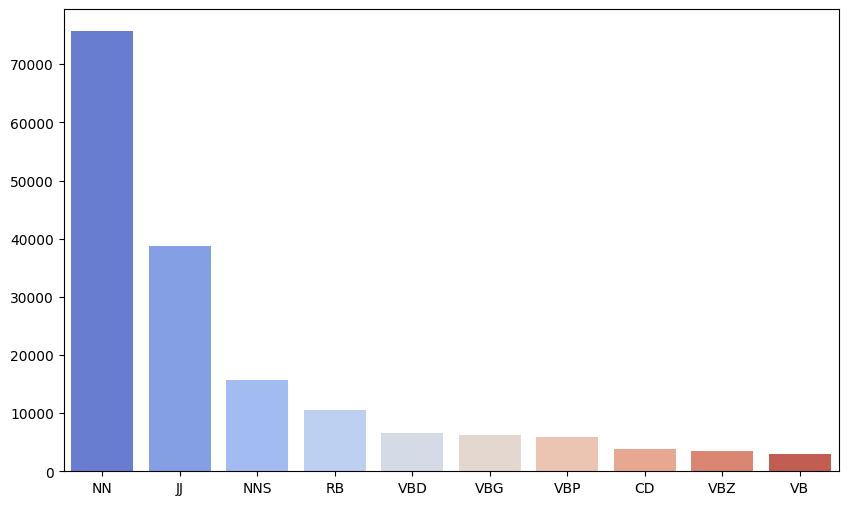

In [26]:
# VISUALIZE POST TAGGING

POST_TAG = dict(tagged)

freqs = {}

# COUNT FREQUENCY EVERY POST-TAG LABELS
for key, value in POST_TAG.items():
    if value not in freqs:
        freqs[value] = 1
    else:
        freqs[value] += 1

# GET TOP 20 POST-TAG LABELS
freqs_sort = sorted(freqs.items(), key= lambda x : x[1], reverse=True)[:10]

# SEPARATE DATA INTO X AND Y
keys = [data[0] for data in freqs_sort]
values = [data[1] for data in freqs_sort]

# VISUALIZE
plt.figure(figsize=(10,6))
sns.barplot(x = keys, y= values, palette='coolwarm')
plt.title('')

In [27]:
# CHANGE SENTIMENT LABELS TO NUMERIC

labels = []

for label in data['sentiment']:

    if label == 'positive':  # IF POSITIVE, THEN REPLACE WITH VALUE 1
        labels.append(1)
    else:
        labels.append(0)   # IF NEGATIVE, THEN REPLACE WITH VALUE 0


In [28]:
# TRAIN TEST SPLIT

# SPLIT DATA INTO TRAIN AND TEST
x_train , x_val, y_train, y_val = train_test_split(final_data, labels, test_size= 0.3, random_state=12, shuffle=True)

# SPLIT VAL DATA INTO VAL AND TEST
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size= 0.2, random_state=12, shuffle=True)


# DISPLAY SOME INFORMATION
print(f'Train data have {len(x_train)} samples')
print(f'Validation data have {len(y_val)} samples')
print(f'Test data have {len(x_test)} samples')
print(f'Type : {type(x_train)}')

Train data have 34707 samples
Validation data have 11900 samples
Test data have 2975 samples
Type : <class 'list'>


In [29]:
# DISPLAY SOME DATA
print(x_train[1])

['disappoint', 'see', 'talented', 'actor', 'amitabh', 'bachchan', 'weak', 'role', 'especially', 'beyond', 'sensational', 'black', 'which', 'highly', 'recommend', 'one', 'line', 'film', 'states', 'sakar', 'mere', 'man', 'think', 'philosophy', 'director', 'ram', 'gopal', 'varma', 'credit', 'godfather', 'inspiration', 'movie', 'perhaps', 'problem', 'seem', 'like', 'badly', 'mangle', 'american', 'movie', 'set', 'india', 'leave', 'elbow', 'index', 'consider', 'seven', 'element', 'filmmaking', 'acting', 'continuity', 'plot', 'character', 'development', 'dialogue', 'artistry', 'production', 'sets', 'on', 'scale', 'high', '10', 'low', 'give', 'average', 'score', 'film', 'continuity', 'seem', 'high', 'maintain', 'violent', 'tone', 'infuse', 'drama', 'places', 'use', 'justice', 'outside', 'legal', 'system', 'motivation', 'however', 'seem', 'lack', 'emotion', 'connect', 'evil', 'organize', 'crime', 'act', 'rat', 'appear', 'weak', 'even', 'someone', 'beat', 'murdered', 'seem', 'hoohum', 'example',

In [30]:
import tensorflow as tf

In [31]:
# FEATURE EXTRACTION USING TF-IDF

# CONVERT TOKEN INTO LIST OF STRINGS
x_train = [' '.join(text) for text in x_train]      # TEXT VECTORIZATION EXPECTS STRINGS TO FIT , NOT TOKEN
x_val   = [' '.join(text) for text in x_val]
x_test  = [' '.join(text) for text in x_test]


vectorizer = tf.keras.layers.TextVectorization(max_tokens= 50000, 
                                               standardize='lower_and_strip_punctuation',
                                               split='whitespace', 
                                               output_mode='int',
                                               output_sequence_length=700,
                                               pad_to_max_tokens=True,
                                               ngrams=1,
                                               )
vectorizer.adapt(x_train)


# TRANSFORM
vectorized_train = vectorizer(x_train)
vectorized_val   = vectorizer(x_val)
vectorized_test  = vectorizer(x_test)

#vectorized_train = np.array(vectorized_train)
#vectorized_val   = np.array(vectorized_val)
#vectorized_test  = np.array(vectorized_test)


In [32]:
# CONVERTING TO TENSOR DATASET
train_dataset = tf.data.Dataset.from_tensor_slices((vectorized_train, y_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((vectorized_val, y_val)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((vectorized_test, y_test)).batch(32)

## Perceptron Architecture with Global Pooling

In [33]:
# BUILD ARCHITECTURE

model_1 = tf.keras.Sequential(layers=[
    tf.keras.layers.Embedding(input_dim=50000, output_dim=24, mask_zero=True, input_length=700),
    tf.keras.layers.Dropout(rate=0.55),
    
    tf.keras.layers.GlobalAveragePooling1D(data_format='channels_last'),

    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model_1.summary()

c:\Users\hajja\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# CREATE CALLBACKS

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6, verbose=1, restore_best_weights='True')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, verbose=1, min_lr=0.00001)

In [35]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
train_1 = model_1.fit(train_dataset, epochs=12, verbose=1, validation_data= val_dataset, shuffle=True, callbacks=[early_stopping, reduce_lr])

Epoch 1/12
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7839 - loss: 0.6150 - val_accuracy: 0.8683 - val_loss: 0.3785 - learning_rate: 0.0010
Epoch 2/12
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8801 - loss: 0.3373 - val_accuracy: 0.8861 - val_loss: 0.2976 - learning_rate: 0.0010
Epoch 3/12
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9064 - loss: 0.2594 - val_accuracy: 0.8953 - val_loss: 0.2689 - learning_rate: 0.0010
Epoch 4/12
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9225 - loss: 0.2172 - val_accuracy: 0.9001 - val_loss: 0.2552 - learning_rate: 0.0010
Epoch 5/12
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9340 - loss: 0.1875 - val_accuracy: 0.9011 - val_loss: 0.2490 - learning_rate: 0.0010
Epoch 6/12
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9441 - loss: 0.1649 - val_accuracy: 0.9021 - val_loss: 0.2475 - learning_rate: 0.0010
Epoch 7/12
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9528 - l

## LSTM Architecture

In [40]:
# BUILD ARCHITECTURE
model_2 = tf.keras.Sequential(layers=[
    tf.keras.layers.Embedding(input_dim=50000, output_dim=10, mask_zero=True, input_length=700),
    tf.keras.layers.Dropout(0.45),
    
    tf.keras.layers.LSTM(units=50, return_sequences=True, dropout=0.5),
    tf.keras.layers.LSTM(units=25, return_sequences=False, dropout=0.6),

    tf.keras.layers.Dense(units=24, activation='linear', activity_regularizer= tf.keras.regularizers.l2(0.01), kernel_regularizer=tf.keras.regularizers.L2(0.015)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
train_2 = model_2.fit(train_dataset, batch_size=70, epochs=8, verbose=1, validation_data= val_dataset, shuffle=True, callbacks=[early_stopping, reduce_lr])

Epoch 1/8
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 464s 426ms/step - accuracy: 0.6750 - loss: 0.7168 - val_accuracy: 0.8850 - val_loss: 0.3648 - learning_rate: 0.0010
Epoch 2/8
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 452s 417ms/step - accuracy: 0.8757 - loss: 0.3798 - val_accuracy: 0.8905 - val_loss: 0.3226 - learning_rate: 0.0010
Epoch 3/8
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 553s 509ms/step - accuracy: 0.8903 - loss: 0.3282 - val_accuracy: 0.8884 - val_loss: 0.3252 - learning_rate: 0.0010
Epoch 4/8
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 490s 451ms/step - accuracy: 0.9144 - loss: 0.2734 - val_accuracy: 0.8918 - val_loss: 0.3075 - learning_rate: 0.0010
Epoch 5/8
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 488s 450ms/step - accuracy: 0.9276 - loss: 0.2406 - val_accuracy: 0.8971 - val_loss: 0.3194 - learning_rate: 0.0010
Epoch 6/8
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 456s 420ms/step - accuracy: 0.9321 - loss: 0.2308 - val_accuracy: 0.8935 - val_loss: 0.3000 - learning_rate: 0.0010
Epoch 7/8
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 446s 412ms/step -

In [43]:
# BUILD ARCHITECTURE

model_3 = tf.keras.Sequential(layers=[
    tf.keras.layers.Embedding(input_dim=50000, output_dim=50, mask_zero=True, input_length=700),
    tf.keras.layers.Dropout(0.45),
    
    tf.keras.layers.Bidirectional(layer= tf.keras.layers.LSTM(units=54, return_sequences=True, dropout=0.35, kernel_regularizer=tf.keras.regularizers.l2(0.01))),
    tf.keras.layers.Bidirectional(layer= tf.keras.layers.LSTM(units=80, return_sequences=False, kernel_regularizer=tf.keras.regularizers.l1(0.00005))),
    tf.keras.layers.Dropout(0.45),
    
    tf.keras.layers.Dense(units=24, activation='selu', activity_regularizer= tf.keras.regularizers.l2(0.01), kernel_regularizer=tf.keras.regularizers.L2(0.015)),
    tf.keras.layers.Dropout(0.70),

    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
train_3 = model_3.fit(train_dataset, epochs=7, batch_size=80, validation_data= val_dataset, verbose=1, callbacks=[early_stopping, reduce_lr], shuffle=True)

Epoch 1/7
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 1371s 1s/step - accuracy: 0.7171 - loss: 1.0062 - val_accuracy: 0.8884 - val_loss: 0.3791 - learning_rate: 0.0010
Epoch 2/7
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 1487s 1s/step - accuracy: 0.9100 - loss: 0.3501 - val_accuracy: 0.8873 - val_loss: 0.3378 - learning_rate: 0.0010
Epoch 3/7
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 1273s 1s/step - accuracy: 0.9411 - loss: 0.2622 - val_accuracy: 0.8872 - val_loss: 0.3580 - learning_rate: 0.0010
Epoch 4/7
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9581 - loss: 0.2195
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 1331s 1s/step - accuracy: 0.9581 - loss: 0.2195 - val_accuracy: 0.8762 - val_loss: 0.4419 - learning_rate: 0.0010
Epoch 5/7
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 1174s 1s/step - accuracy: 0.9633 - loss: 0.1867 - val_accuracy: 0.8713 - val_loss: 0.4273 - learning_rate: 5.0000e-04
Epoch 6/7
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.972

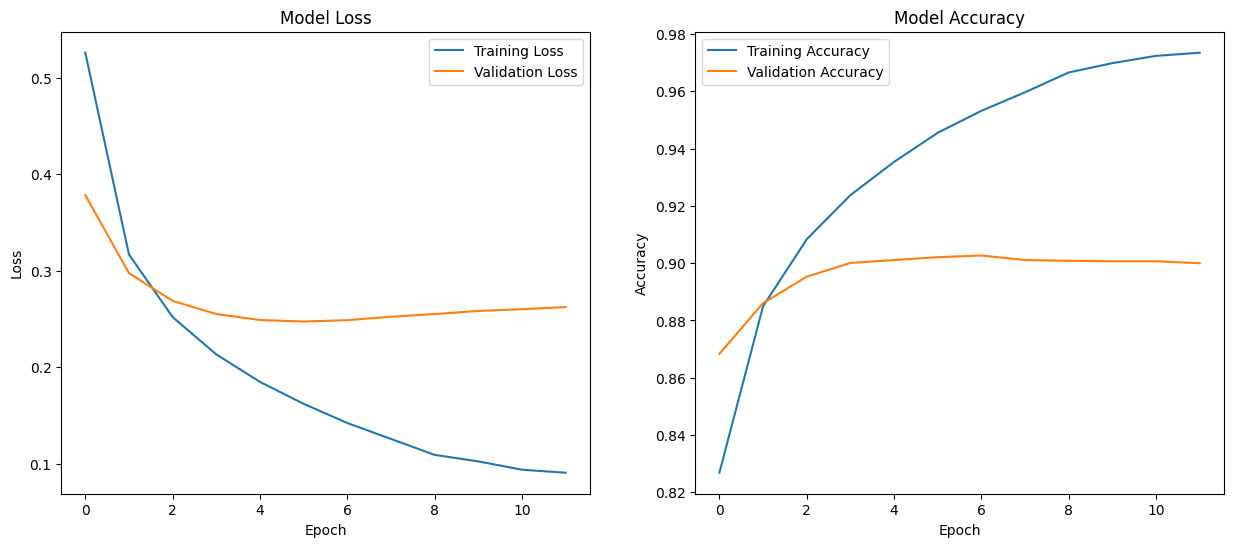

In [46]:
# SHOW METRICS EVALUATION

train_loss_1 = train_1.history['loss']
val_loss_1  = train_1.history['val_loss']

train_accuracy_1  = train_1.history['accuracy']
val_accuracy_1    = train_1.history['val_accuracy']

epoch = range(len(train_loss_1))

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(epoch, train_loss_1, label='Training Loss')
plt.plot(epoch, val_loss_1, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_accuracy_1, label='Training Accuracy')
plt.plot(epoch, val_accuracy_1, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [47]:
# MODEL EVALUATION

# PREDICT TEST MODEL
y_prediction = model_1.predict(vectorized_test)
y_prediction_class = []

# IF VALUE MORE THAN 0.5 , THEN IT CATEGORIZED AS POSITIVE REVIEWS, OTHERWISE NEGATIVE REVIEWS
for value in y_prediction:  
    if value > 0.5:
        y_prediction_class.append(1)
    else:
        y_prediction_class.append(0)


# EVALUATION
accuracy  = accuracy_score(y_test, y_prediction_class)
precision = precision_score(y_test, y_prediction_class)
recall    = recall_score(y_test, y_prediction_class)
f1        = f1_score(y_test, y_prediction_class)

print(f'Accuracy  : {accuracy}')
print(f'Precision : {precision}')
print(f'recall    : {recall}')
print(f'F-1       : {f1}')

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy  : 0.9025210084033614
Precision : 0.9022950819672131
recall    : 0.9070533948582729
F-1       : 0.9046679815910585


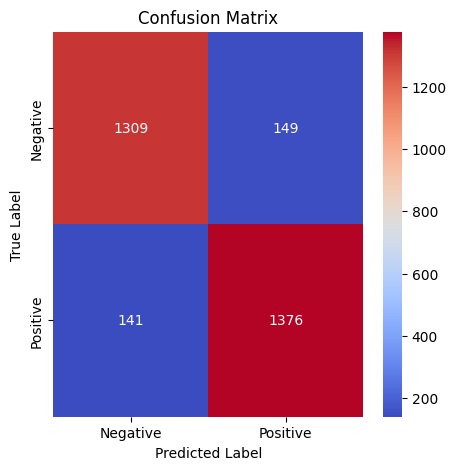

In [48]:
# PLOT CONFUSION MATRIX

matrix = confusion_matrix(y_test, y_prediction_class)

plt.figure(figsize=(5,5))

sns.heatmap(data= matrix, cmap='coolwarm', annot=True, fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**SECOND MODEL**

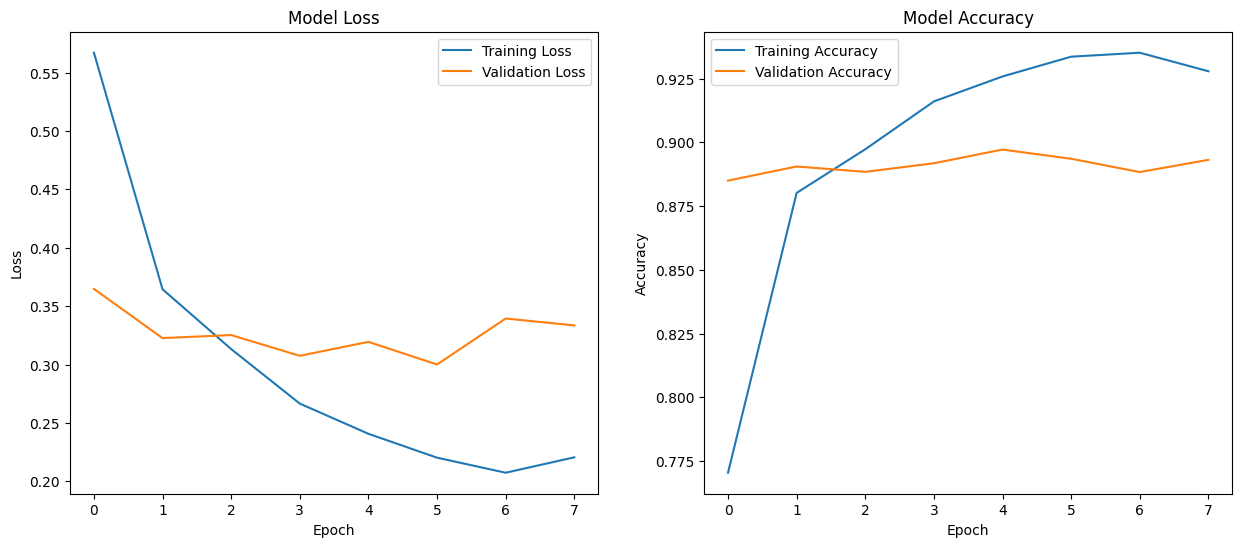

In [49]:
# SHOW METRICS EVALUATION

train_loss_2 = train_2.history['loss']
val_loss_2   = train_2.history['val_loss']

train_accuracy_2 = train_2.history['accuracy']
val_accuracy_2   = train_2.history['val_accuracy']

epoch = range(len(train_loss_2))

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(epoch, train_loss_2, label='Training Loss')
plt.plot(epoch, val_loss_2, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_accuracy_2, label='Training Accuracy')
plt.plot(epoch, val_accuracy_2, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [50]:
# MODEL EVALUATION

# PREDICT TEST MODEL
y_prediction = model_2.predict(vectorized_test)
y_prediction_class = []

# IF VALUE MORE THAN 0.5 , THEN IT CATEGORIZED AS POSITIVE REVIEWS, OTHERWISE NEGATIVE REVIEWS
for value in y_prediction:  
    if value > 0.5:
        y_prediction_class.append(1)
    else:
        y_prediction_class.append(0)


# EVALUATION
accuracy  = accuracy_score(y_test, y_prediction_class)
precision = precision_score(y_test, y_prediction_class)
recall    = recall_score(y_test, y_prediction_class)
f1        = f1_score(y_test, y_prediction_class)

print(f'Accuracy  : {accuracy}')
print(f'Precision : {precision}')
print(f'recall    : {recall}')
print(f'F-1       : {f1}')

93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step
Accuracy  : 0.8981512605042017
Precision : 0.8931347150259067
recall    : 0.9090309822017139
F-1       : 0.9010127409343351


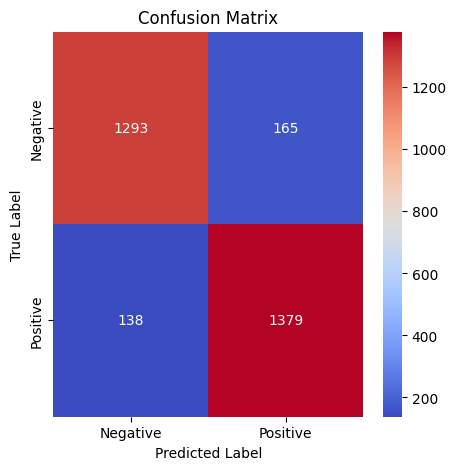

In [51]:
# PLOT CONFUSION MATRIX

matrix = confusion_matrix(y_test, y_prediction_class)

plt.figure(figsize=(5,5))

sns.heatmap(data= matrix, cmap='coolwarm', annot=True, fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**3 EME**

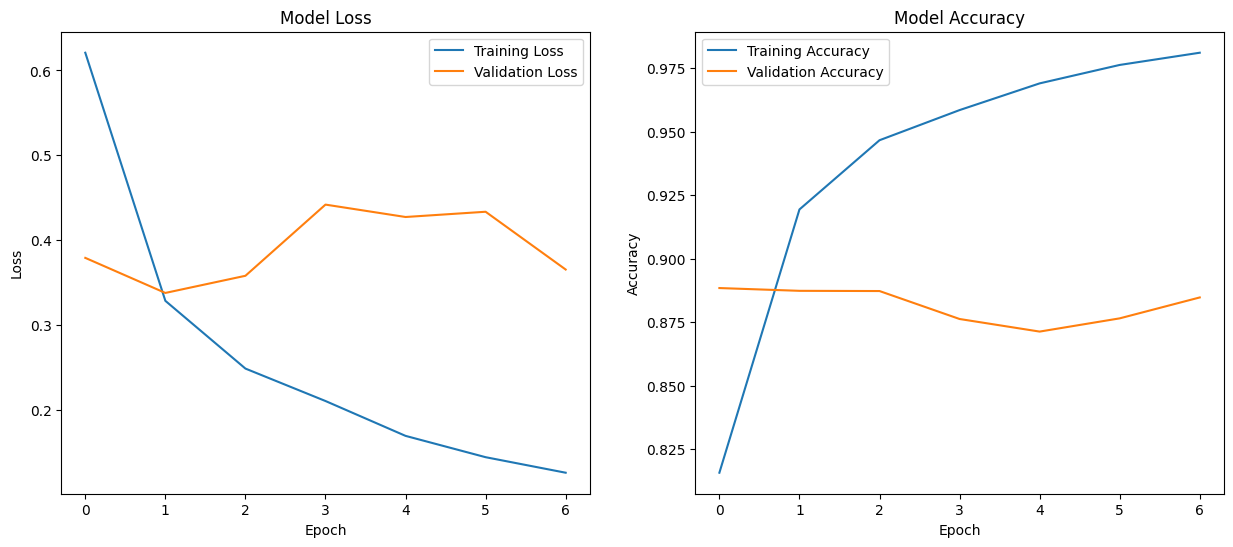

In [52]:
# SHOW METRICS EVALUATION

train_loss_3= train_3.history['loss']
val_loss_3  = train_3.history['val_loss']

train_accuracy_3 = train_3.history['accuracy']
val_accuracy_3 = train_3.history['val_accuracy']

epoch = range(len(train_loss_3))

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(epoch, train_loss_3, label='Training Loss')
plt.plot(epoch, val_loss_3, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_accuracy_3, label='Training Accuracy')
plt.plot(epoch, val_accuracy_3, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [53]:
# MODEL EVALUATION

# PREDICT TEST MODEL
y_prediction = model_3.predict(vectorized_test)
y_prediction_class = []

# IF VALUE MORE THAN 0.5 , THEN IT CATEGORIZED AS POSITIVE REVIEWS, OTHERWISE NEGATIVE REVIEWS
for value in y_prediction:  
    if value > 0.5:
        y_prediction_class.append(1)
    else:
        y_prediction_class.append(0)


# EVALUATION
accuracy  = accuracy_score(y_test, y_prediction_class)
precision = precision_score(y_test, y_prediction_class)
recall    = recall_score(y_test, y_prediction_class)
f1        = f1_score(y_test, y_prediction_class)

print(f'Accuracy  : {accuracy}')
print(f'Precision : {precision}')
print(f'recall    : {recall}')
print(f'F-1       : {f1}')

93/93 ━━━━━━━━━━━━━━━━━━━━ 24s 255ms/step
Accuracy  : 0.8890756302521008
Precision : 0.8643339472068754
recall    : 0.9281476598549769
F-1       : 0.8951048951048951


In [70]:
# Print actual vs predicted values for the first 20 samples
comparison_df = pd.DataFrame({'Actual': y_test[:10], 'Predicted': y_prediction_class[:10]})
print("\nActual vs Predicted values (First 20 samples):")
print(comparison_df)


Actual vs Predicted values (First 20 samples):
   Actual  Predicted
0       0          0
1       0          0
2       1          1
3       0          0
4       0          0
5       0          0
6       0          0
7       1          1
8       0          1
9       0          0


In [68]:
# S'assurer que y_test et y_prediction_class sont sous forme de tableaux NumPy
y_test_array = np.array(y_test)
y_pred_array = np.array(y_prediction_class)

# Calcul du nombre d'éléments mal classifiés
misclassified_count = np.sum(y_test_array != y_pred_array)

# Calcul du taux de misclassification
misclassification_rate = misclassified_count / len(y_test_array)

print(f'Misclassified Samples : {misclassified_count}')
print(f'Misclassification Rate : {misclassification_rate:.4f}')



Misclassified Samples : 330
Misclassification Rate : 0.1109


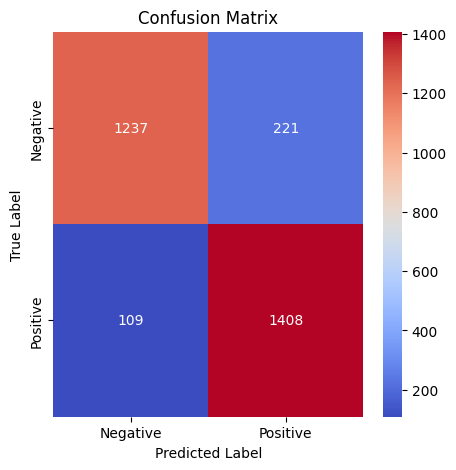

In [54]:
# PLOT CONFUSION MATRIX

matrix = confusion_matrix(y_test, y_prediction_class)

plt.figure(figsize=(5,5))

sns.heatmap(data= matrix, cmap='coolwarm', annot=True, fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [64]:
x_test[:10]

['wait movie long time especially juhi chawla this great actressthis movie contain six stories new concept fly hollywood new item1 khamini priyanka chopra dancer want get famous make boyfriend let news reporter interest her rahul salman khan appear claim boyfriendpriyanka chopra still good actress yells get annoyed salman khan can not play comic roles serious part marvelous2 vinay anil kapoor marry seema juhi chawla get midlife crisis get attract much young woman forget really life wife kidsanil kapoor en juhi natural bear actor actresses great story thin them3 shiven akshaye khanna go get marry gia ayesha takia get cold foot blow wed off4 ashutosh joh abraham marry tehzeeb vidya balan get accident suffer memory loss know love husband anymore5 raju govinda cab driver meet stephani shannon esrechowitz white woman love indian male get marry indian woman raju bring staphani man fall love heri never like govinda movies annoying funny movie like much like grow last years6 oh yes sohail khan

In [65]:
y_prediction[:10]

array([[nan]], dtype=float32)

In [62]:
# PREDICT A NEW REVIEWS
prompt = input('Enter a Reviews : ')


# REMOVE HTML TAG (if any)
clean_data = []
soup = BeautifulSoup(prompt, 'html.parser')  # DEFINE BEAUTIFUL SOUP
text = soup.get_text()     # GET ONLY TEXT FROM BEAUTIFULSOUP
clean_data.append(text)

# REMOVE STOPWORDS
cleaned_data = []
for review in clean_data:
    for word in review.split():
        cleaned_data.append(word)

# LEMMATIZATION
lemmatized_data = []
for review in cleaned_data:

    # LEMMATIZE ADJECTIVES TOKEN/WORD
    clean_text_1 = [lemma.lemmatize(word= word, pos='a') for word in review.split()]  
    clean_text_1 = ' '.join(clean_text_1)  # COMBINES EVERY WORD INTO SENTENCES

    # LEMMATIZE VERB TOKEN/WORD
    clean_text_2 = [lemma.lemmatize(word = word, pos='v') for word in clean_text_1.split()] 
    clean_text_2 = ' '.join(clean_text_2) # COMBINES EVERY WORD INTO SENTENCES

    # LEMMATIZE NOUN TOKEN/WORD
    clean_text_3 = [lemma.lemmatize(word= word, pos='n') for word in clean_text_2.split()] 
    clean_text_3 = ' '.join(clean_text_3)

    lemmatized_data.append(clean_text_3) 

# REMOVE PUNCTUATION
cleaned_token = []
for token in lemmatized_data:             # ITERATE OVER LIST OF TOKEN

    # ITERATE OVER EVERY TOKEN
    clean_token = re.sub(pattern= r'[^\w\s]', repl= '', string= token)  # REPLACE ALL PUNCTUATION INTO EMPTY STRING ''

    # PUSH NON EMPTY STRINGS AND REMOVE CHARACTERS THAT HAVE ONLY 1
    if len(clean_token) > 1 :
        cleaned_token.append(clean_token)

# TEXT VECTORIZATION
final_data = [' '.join(cleaned_token)]   
vectorized_data = vectorizer(final_data)

# PREDICTION (WE USED THE BEST MODEL TO PREDICT NEW REVIEWS)
y_prediction = model_1.predict(vectorized_data)

print(prompt)
if y_prediction > 0.5:
    print(f'\n\033[1mThis is Positive Reviews\033[0m')
else:
    print(f'\n\033[1mThis is Negative Reviews\033[0m')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


This is Negative Reviews


In [72]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import tensorflow.keras.backend as K

# Définition de la couche d'attention corrigée
class Attention(layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]),
                                 initializer="glorot_uniform",
                                 trainable=True)
        self.b = self.add_weight(shape=(input_shape[-1],),
                                 initializer="zeros",
                                 trainable=True)
        self.u = self.add_weight(shape=(input_shape[-1],),
                                 initializer="glorot_uniform",
                                 trainable=True)

    def call(self, inputs):
        # Calcul des scores d'attention
        score = K.tanh(K.dot(inputs, self.W) + self.b)
        attention_weights = K.softmax(K.dot(score, K.expand_dims(self.u, axis=-1)), axis=1)

        # Appliquer l'attention
        weighted_output = inputs * attention_weights

        return K.sum(weighted_output, axis=1)  # Somme pondérée des séquences

# Construction du modèle
input_layer = layers.Input(shape=(700,))
embedding_layer = layers.Embedding(input_dim=50000, output_dim=10, mask_zero=True)(input_layer)

lstm_layer = layers.LSTM(units=50, return_sequences=True, dropout=0.5)(embedding_layer)
attention_layer = Attention()(lstm_layer)  # Appliquer l'attention

dense_layer = layers.Dense(units=24, activation='linear',
                           activity_regularizer=regularizers.L2(0.01),
                           kernel_regularizer=regularizers.L2(0.015))(attention_layer)
dropout_layer = layers.Dropout(0.5)(dense_layer)

output_layer = layers.Dense(units=1, activation='sigmoid')(dropout_layer)

# Création du modèle
model_attention = models.Model(inputs=input_layer, outputs=output_layer)

# Affichage du résumé
model_attention.summary()

# Compilation du modèle
model_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
train_attention = model_attention.fit(train_dataset, epochs=8, verbose=1, validation_data=val_dataset, 
                                      shuffle=True, callbacks=[early_stopping, reduce_lr])


c:\Users\hajja\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\layer.py:938: UserWarning: Layer 'attention_1' (of type Attention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 700)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 700, 10)   │    500,000 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_4         │ (None, 700)       │          0 │ input_layer_4[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 700, 50)   │     12,200 │ embedding_6[0][0… │
│                     │                   │            │ not_equal_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 50)        │      2,600 │ lstm_9[0][0]      │
│ (Attention)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 24)        │      1,224 │ attention_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 24)        │          0 │ dense_9[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1)         │         25 │ dropout_10[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 516,049 (1.97 MB)

 Trainable params: 516,049 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 227s 206ms/step - accuracy: 0.7289 - loss: 0.6812 - val_accuracy: 0.8903 - val_loss: 0.3489 - learning_rate: 0.0010
Epoch 2/8
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 246s 227ms/step - accuracy: 0.9087 - loss: 0.3193 - val_accuracy: 0.8901 - val_loss: 0.3181 - learning_rate: 0.0010
Epoch 3/8
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 242s 223ms/step - accuracy: 0.9309 - loss: 0.2499 - val_accuracy: 0.8834 - val_loss: 0.3297 - learning_rate: 0.0010
Epoch 4/8
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.9468 - loss: 0.2034
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 243s 224ms/step - accuracy: 0.9468 - loss: 0.2034 - val_accuracy: 0.8864 - val_loss: 0.3255 - learning_rate: 0.0010
Epoch 5/8
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 246s 227ms/step - accuracy: 0.9593 - loss: 0.1659 - val_accuracy: 0.8888 - val_loss: 0.3318 - learning_rate: 5.0000e-04
Epoch 6/8
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step -

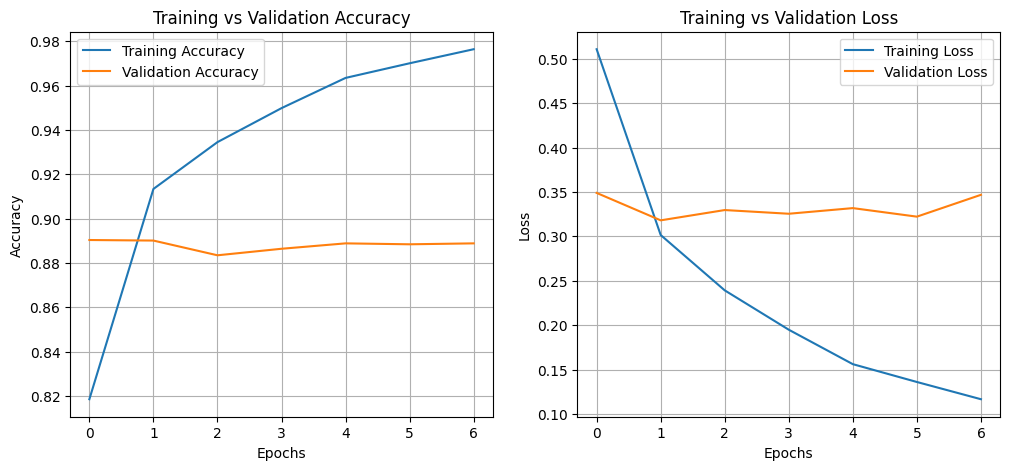

In [74]:
import matplotlib.pyplot as plt

# Extracting the history from the model training
history = train_attention.history  # Replace with train_1, train_2, etc., for different models

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()

plt.show()


In [75]:
# Convert predicted probabilities to class labels (0 or 1)
y_prediction = model_attention.predict(vectorized_test)
y_prediction_class = (y_prediction > 0.5).astype(int)  # Threshold at 0.5

# Compute Evaluation Metrics
accuracy  = accuracy_score(y_test, y_prediction_class)
precision = precision_score(y_test, y_prediction_class)
recall    = recall_score(y_test, y_prediction_class)
f1        = f1_score(y_test, y_prediction_class)

# Print Metrics
print(f'Accuracy  : {accuracy:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall    : {recall:.4f}')
print(f'F1-score  : {f1:.4f}')


93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step
Accuracy  : 0.8995
Precision : 0.9093
Recall    : 0.8919
F1-score  : 0.9005


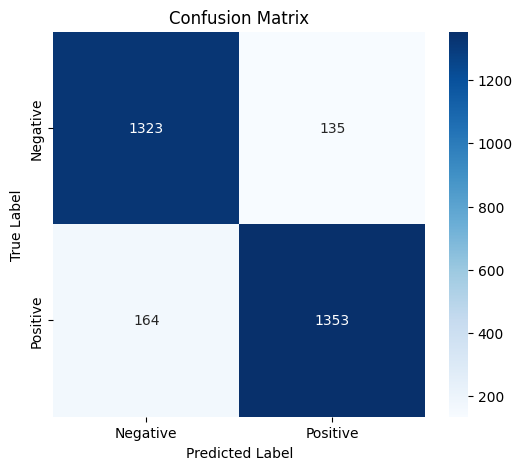

In [76]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_prediction_class)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
